In [1]:
import fiona
import rasterio
import rasterio.mask
import numpy as np

In [2]:
def maskOutRaster(features, rasterName):
    # read raster image
    with rasterio.open('data/' + rasterName) as src:
        out_image, out_transform = rasterio.mask.mask(src, features,
                                                        crop=True)
        out_meta = src.meta.copy()
    
    # write raster image after masking out
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    with rasterio.open("RGB/" + rasterName, "w", **out_meta) as dest:
        dest.write(out_image)

In [4]:
yearLabel = '2017'
shapefilePath = 'water-bodies-09-08-2016/water-bodies.shp'
# read shapefile
with fiona.open(shapefilePath, "r") as shapefile:
     features = [feature["geometry"] for feature in shapefile]
        
for i in range(12,13):
    rasterName = 'Tonlesap_' + yearLabel +  str(i).zfill(2) + '.tif'
    maskOutRaster(features, rasterName)

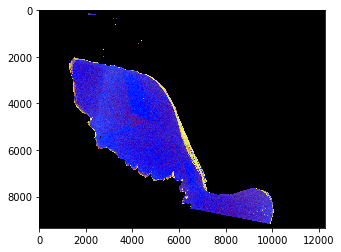

In [17]:
def rgb_img(r, g, b):
    false_color_raster = np.concatenate(
        [r[..., np.newaxis],
         g[..., np.newaxis],
         b[..., np.newaxis]], axis=-1)
    false_color_raster = (false_color_raster / np.max(false_color_raster) * 255).astype(np.uint8)
    return false_color_raster

from matplotlib import pyplot as plt
with rasterio.open("/home/lamductan/Hydroviet/Tonlesap/RGB.byte.masked.tif") as src:
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)
    rgbImg = rgb_img(r,g,b)
    plt.imshow(rgbImg)